# COMP4220: Machine Learning, Spring 2022, Assignment 4


> ## **Please submit one pdf file for all questions.**


# 1. KMeans:

In [14]:
#importing the libraries --add any additional libraries you will need here
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import seaborn as sns


In [15]:
url = "https://raw.githubusercontent.com/nnguyen09/Machine-Learning-/master/assignment4/titanic.csv"

X_train = pd.read_csv(url)


# removing the columns not of interest
X_train = X_train.drop(['PassengerId','Name','Ticket', 'Cabin','Embarked','Pclass','SibSp','Sex','Parch','Fare'], axis=1)

# removing rows of data with NaN 
X_train = X_train[X_train['Age'].notna()]




In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## a) Define X and y from the training data. Answer provided. Print X and y to see data.

In [17]:
X = X_train.drop(['Survived'], 1).astype(float)
y = X_train['Survived']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


## b) Perform KMeans on X

In [18]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)


KMeans(n_clusters=2)

## c) Plot the prediction for X

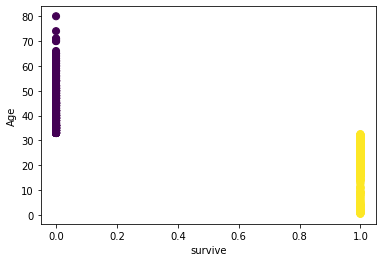

In [19]:
#prediction for X
y_kmeans = kmeans.predict(X)

plt.scatter(y_kmeans, X, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('survive')
plt.ylabel('Age')
centers = kmeans.cluster_centers_


## d) Compute the accuracy 

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_kmeans)


0.48179271708683474

# 2. Classification using SVM

---



This is data collected from brain waves collection during a pain detection research project.

In [21]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [22]:
url_pain_csv = 'https://raw.githubusercontent.com/nnguyen09/Machine-Learning-/master/assignment4/pain.csv'
painData = pd.read_csv(url_pain_csv)

In [23]:
painData = painData.drop(['SubjectID','Index','Date', 'Time'], axis=1)
painData

,PainType,TP9,AF7,AF8,TP10,Right Axis,label
0,severe pain,68.847656,-73.242188,18.066406,27.832031,25.390625,3
1,severe pain,44.921875,-235.351562,36.621094,27.832031,-4.394531,3
2,severe pain,-11.230469,-81.054688,45.410156,29.296875,12.207031,3
3,severe pain,-2.929688,17.089844,33.203125,24.902344,44.433594,3
4,severe pain,10.253906,-58.105469,32.226562,14.648438,-0.976562,3
...,...,...,...,...,...,...,...
60191,moderate pain,33.203125,287.597656,45.898438,27.832031,25.878906,2
60192,moderate pain,24.414062,-20.507812,32.226562,21.484375,34.179688,2
60193,moderate pain,28.808594,-270.019531,24.902344,24.902344,34.667969,2
60194,moderate pain,37.109375,-190.917969,30.761719,31.250000,-36.132812,2


The label column is the target, and pain type is an explanation.

## a) Get X and y from painData above. X is TP9 and Right Axis. Y is label.

In [24]:
X=painData[['TP9','Right Axis']]
print(X)
y=painData[['label']]
print(y)

             TP9  Right Axis
0      68.847656   25.390625
1      44.921875   -4.394531
2     -11.230469   12.207031
3      -2.929688   44.433594
4      10.253906   -0.976562
...          ...         ...
60191  33.203125   25.878906
60192  24.414062   34.179688
60193  28.808594   34.667969
60194  37.109375  -36.132812
60195  31.250000   -8.789062

[60196 rows x 2 columns]
       label
0          3
1          3
2          3
3          3
4          3
...      ...
60191      2
60192      2
60193      2
60194      2
60195      2

[60196 rows x 1 columns]


## a) Using a regularization parameter of c=1 and c=100, using a LinearSVC. 

In [29]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss='hinge', random_state=42)
svm_clf2 = LinearSVC(C=100, loss='hinge', random_state=42)


## b) Scale the dataset using a pipeline

In [30]:
scaled_svm_clf1=Pipeline([('scaler',scaler),('linear_svc', svm_clf1)])
scaled_svm_clf2=Pipeline([('scaler',scaler),('linear_svc', svm_clf2)])
scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

## c) Plot dataset using the regularization parameter of c=1 and c=100

# 3. Decision Trees:
Using the same dataset above, meaning X and y

## a) Print the shape of X and y

In [27]:
print(X.shape)

(60196, 2)


In [28]:
print(y.shape)

(60196, 1)


## b) Train using a decision tree classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) 
tree_clf.fit(X,y)



DecisionTreeClassifier(max_depth=2, random_state=42)

c) Visualize the dataset

[Text(0.5, 0.8333333333333334, 'X[0] <= 71.045\ngini = 0.8\nsamples = 60196\nvalue = [12516, 11920, 11920, 11920, 11920]'),
 Text(0.25, 0.5, 'X[0] <= 5.127\ngini = 0.796\nsamples = 52405\nvalue = [11416, 11516, 10596, 11285, 7592]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.748\nsamples = 13402\nvalue = [1239, 1130, 2678, 3712, 4643]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.776\nsamples = 39003\nvalue = [10177, 10386, 7918, 7573, 2949]'),
 Text(0.75, 0.5, 'X[1] <= -38.818\ngini = 0.633\nsamples = 7791\nvalue = [1100, 404, 1324, 635, 4328]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.251\nsamples = 1106\nvalue = [11, 31, 80, 31, 953]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.673\nsamples = 6685\nvalue = [1089, 373, 1244, 604, 3375]')]

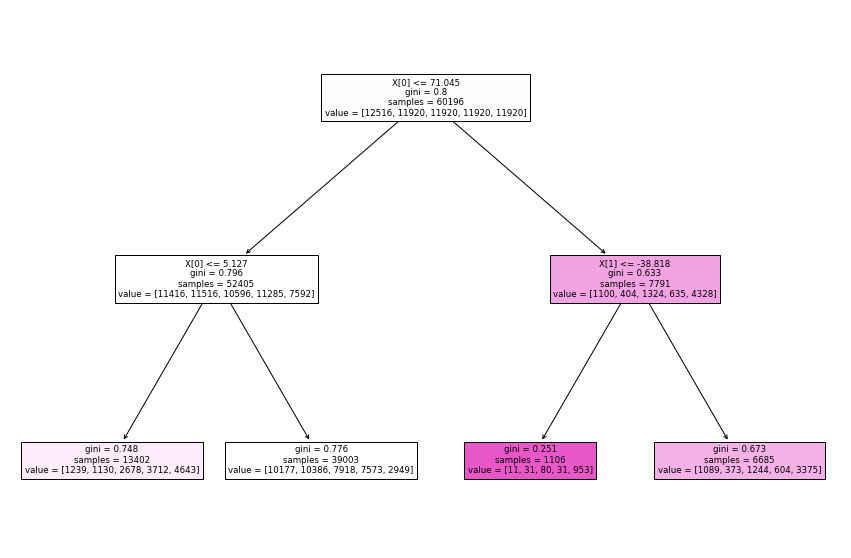

In [64]:
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clf, filled = True)

d) Plot the decision boundaries of the dataset

# 4. Ensemble Classifier and Random forest
Run on pain.csv

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)


## a) Run a voting classifier that includes logistic regression, random forest classifier and SVM

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf=LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf=SVC(gamma="scale", random_state=42)

voting_clf=VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='hard'
)

voting_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

## b) Print the accuracy scores 

In [76]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression 0.2711808093561034


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier 0.3290584091966244


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.39331517044321884


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.36434314572396836
